<a href="https://colab.research.google.com/github/shwetamakwana/cs-assignments/blob/master/JIETML_cs_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'17yZ1NSSsRrDF7qfGOJyGHRDDiBce7EQN'}) 
downloaded.GetContentFile('Adult.csv') 

**load data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Adult.csv')

In [ ]:
miss=['?']
df=pd.read_csv('Adult.csv',na_values=miss)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isnull().sum()/len(df)*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [ ]:
!pip install missingno

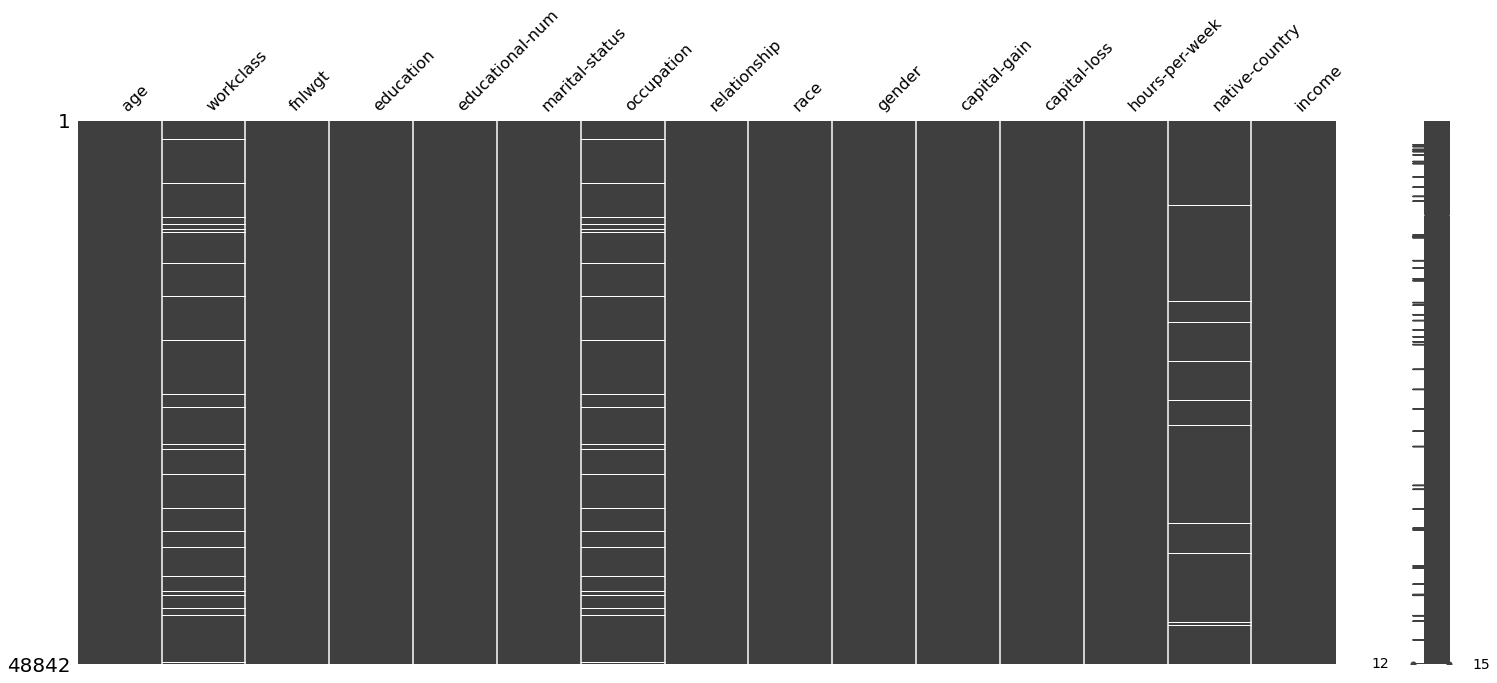

In [ ]:
import missingno as msno
msno.matrix(df)

**data preparation**

In [ ]:
df.drop(columns="fnlwgt",axis=1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
label=df['workclass']
data=df.drop('workclass',axis=1)
data=data.drop('education',axis=1)
data=data.drop('marital-status',axis=1)
data=data.drop('native-country',axis=1)
data=data.drop('race',axis=1)
data=data.drop('gender',axis=1)
data=data.drop('relationship',axis=1)
data=data.drop('occupation',axis=1)
data=data.drop('income',axis=1)


In [ ]:
print(data.shape)
print(label.shape)

(48842, 7)
(48842,)


**standardizing the data**

In [ ]:
#data-preprocessing: standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data= StandardScaler().fit_transform(data)
print(standardized_data.shape)

(48842, 6)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

In [ ]:
pca.fit(standardized_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x=data[['age','educational-num','capital-gain','capital-loss','hours-per-week']]
y=df['income']

**train data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,\
                                               y,\
                                               test_size=0.25,\
                                               random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**prediction**

In [ ]:
y_test_pred=classifier.predict(x_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeClassifier(max_depth=5)
regressor.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**accuracy**

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.8301531406109246

**evaluation of model**

In [ ]:
print(metrics.classification_report(y_test,y_test_pred))



              precision    recall  f1-score   support

       <=50K       0.84      0.96      0.90      9273
        >50K       0.76      0.43      0.55      2938

    accuracy                           0.83     12211
   macro avg       0.80      0.69      0.72     12211
weighted avg       0.82      0.83      0.81     12211



In [ ]:
from sklearn.linear_model import LinearRegression
regressor_temp=LinearRegression()

**logistic regression**

In [ ]:
from sklearn.feature_selection import RFE
rfe =RFE(regressor_temp)
rfe = rfe.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,\
                                                y,\
                                                test_size=0.25,\
                                                random_state=0)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
#accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8229465236262387

**K-nn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8229465236262387

**SVM**

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
#calculate the accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.800589632298747

In [ ]:
con_metric=metrics.confusion_matrix(y_test,y_pred)
con_metric

array([[8958,  315],
       [2120,  818]])

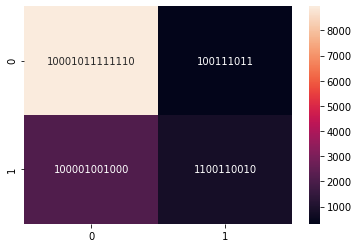

In [ ]:
#heatmap for confusion matrix
sns.heatmap(con_metric,annot=True,fmt='b')
plt.show()